# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
wego = pd.read_csv('../data/Headway Data, 8-1-2023 to 9-30-2023.csv')

In [3]:
wego.shape

(350329, 30)

In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

## create unique trip id

In [ ]:
def create_id(row):
    row['CALENDAR_ID'] + ''

In [6]:
wego['DATE_TRIP'] = wego.apply(lambda row: str(row['CALENDAR_ID']) + '-' + str(row['TRIP_ID']), axis=1)

In [8]:
wego['DATE_TRIP'].nunique()

67370

# 1) What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [7]:
round(wego['ADJUSTED_ONTIME_COUNT'].value_counts()[1] / wego.shape[0] * 100, 2)

77.08

#### 77% of checkins here considered ontime.

In [72]:
trips_adherence_cat = (wego.groupby('DATE_TRIP')
.sum()
[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']])

In [73]:
perfect_trips = (adherence_category_sums[
    (trips_adherence_cat['ADJUSTED_EARLY_COUNT'] == 0) & 
    (trips_adherence_cat['ADJUSTED_LATE_COUNT'] == 0)])

In [33]:
round(perfect_trips.shape[0] / trips_adherence_cat.shape[0] * 100, 2)

60.62

In [42]:
perfect_trips.shape[0]

40843

#### 60.6% of all trips were ontime, 40843 perfect trips

In [46]:
wego['ADHERENCE'].apply(['min', 'max', 'mean', 'median'])

min      -948.533333
max        88.383333
mean       -3.188796
median     -2.000000
Name: ADHERENCE, dtype: float64

In [47]:
wego['HDWY_DEV'].apply(['min', 'max', 'mean', 'median'])

min       -64.000000
max       565.433333
mean        0.518081
median      0.033333
Name: HDWY_DEV, dtype: float64

In [75]:
# Calculate Adherence mean and standard deviation
ad_mean = wego['ADHERENCE'].mean()
ad_std = np.std(wego['ADHERENCE'])

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

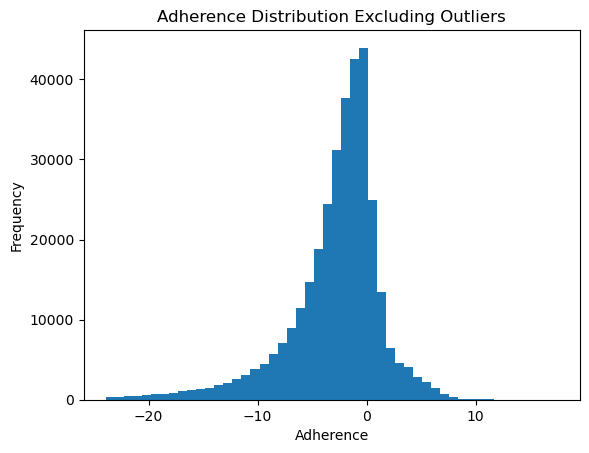

In [70]:
ax = (
    wego[wego['ADHERENCE'].between(ad_mean - ad_std*3,
                                   ad_mean + ad_std*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50)
)

ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel='Adherence'
    )

In [74]:
# Calculate Headway Deviation mean and standard deviation
hd_mean = wego['HDWY_DEV'].mean()
hd_std = np.std(wego['HDWY_DEV'])

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

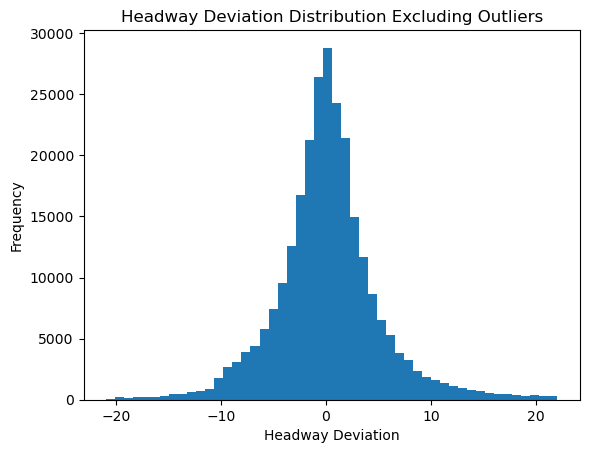

In [69]:
ax= (
    wego[wego['HDWY_DEV'].between(hd_mean - hd_std*3, 
                                  hd_mean + hd_std*3, 
                                  inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist', bins=50)
)

ax.set(
    title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation'
    )

# 2) How does direction of travel, route, or location affect the headway and on-time performance?

In [87]:
wego.groupby('ROUTE_DIRECTION_NAME')[['ADHERENCE', 'HDWY_DEV']].describe()

ADHERENCE                                            \
                         count      mean       std         min       25%   
ROUTE_DIRECTION_NAME                                                       
FROM DOWNTOWN         179306.0 -3.960287  7.234279 -948.533333 -5.466666   
TO DOWNTOWN           159555.0 -2.321804  6.391098 -618.166666 -3.666666   

                                                     HDWY_DEV            \
                           50%       75%        max     count      mean   
ROUTE_DIRECTION_NAME                                                      
FROM DOWNTOWN        -2.516666 -0.633333  76.766666  141392.0  0.579990   
TO DOWNTOWN          -1.500000 -0.100000  88.383333  124501.0  0.447773   

                                                                             
                           std        min   25%       50%   75%         max  
ROUTE_DIRECTION_NAME                                                         
FROM DOWNTOWN         7.773842 -55.533334 -2.65  0.033333  2.85  565.433333  
TO DOWNTOWN           6.395390 -64.000000 -2.00  0.033333  2.15  543.833333

#### TO DOWNTOWN direction has a slightly better performance

In [88]:
wego.groupby('ROUTE_ABBR')[['ADHERENCE', 'HDWY_DEV']].describe()

ADHERENCE                                                      \
               count      mean       std         min       25%       50%   
ROUTE_ABBR                                                                 
3            45488.0 -3.761491  5.415910 -133.250000 -5.350000 -2.566666   
7            17267.0 -3.346555  6.669753  -87.716666 -4.916666 -2.116666   
22           25188.0 -1.138107  6.391798 -675.000000 -2.950000 -0.933333   
23           39653.0 -1.760110  7.680491 -618.166666 -3.116666 -1.316666   
50           42629.0 -2.505022  6.159666 -489.316666 -3.883333 -1.800000   
52           49327.0 -3.971342  8.721732 -948.533333 -5.016666 -2.066666   
55           60359.0 -4.823302  7.535092 -375.233333 -6.583333 -2.883333   
56           58950.0 -2.703988  4.931009 -322.783333 -4.300000 -1.900000   

                                HDWY_DEV                                  \
                 75%        max    count      mean        std        min   
ROUTE_ABBR                                                                 
3          -0.766666  33.750000  36583.0  0.580907   6.203530 -64.000000   
7          -0.616666  88.383333  11578.0  0.336808   5.909983 -30.433334   
22          0.816666  24.733333  17007.0  0.955867  10.248444 -43.650000   
23          0.033333  33.633333  28478.0  1.053563   9.881327 -32.116667   
50         -0.300000  22.350000  34593.0  0.212376   4.760558 -33.250000   
52         -0.400000  30.200000  39887.0  0.974776   9.185015 -55.533334   
55         -0.850000  40.250000  49432.0  0.261038   6.364978 -29.933334   
56         -0.283333  39.916666  48335.0  0.149213   4.714435 -27.266667   

                                                      
                 25%       50%       75%         max  
ROUTE_ABBR                                            
3          -2.450000  0.116666  2.800000   76.866666  
7          -1.983334  0.033333  2.133333   50.250000  
22         -1.966667  0.050000  2.200000  508.700000  
23         -1.733334  0.066666  2.066666  565.433333  
50         -2.083334  0.033333  2.183333   54.283333  
52         -2.450000  0.083333  2.783333  472.366666  
55         -3.150000 -0.033334  2.983333  102.000000  
56         -2.333334  0.000000  2.383333  166.000000

#### Route 22 has better overall Adherence while route 56 has better headway deviation

In [98]:
wego.groupby('BLOCK_ABBR')[['ADHERENCE', 'HDWY_DEV']].mean().abs().sort_values('ADHERENCE', ascending=True)

,ADHERENCE,HDWY_DEV
BLOCK_ABBR,,
8604,0.281250,1.238889
2301,0.353140,0.263938
2210,0.442440,0.874254
2211,0.529404,0.778633
8401,0.603704,NaN
...,...,...
5218,7.901945,3.985199
5513,8.414195,0.912638
5590,9.226351,NaN


# 3) How does time of day or day of week affect headway and on-time performance?